In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from utils.file_ops import *
from datetime import datetime
%matplotlib inline

In [3]:
path_visits = "data/QIdudes.csv"
df_visits = returnDF(path_visits)
df_visits.head()

preparing to open csv at: data/QIdudes.csv
done preparing dataframe


,LastModifiedDateTime,LocationName,Note PropertyName,Note PropertyValue,PatientNumber,ProviderName,VisitDate
0,5/13/2018 2:29:32 PM,ARBOR,QIDiabetes,No,N0066993,"JAFFE, GILAD",5/13/2018 1:45:00 PM
1,5/13/2018 2:29:32 PM,ARBOR,QIPap,Not Indicated,N0066993,"JAFFE, GILAD",5/13/2018 1:45:00 PM
2,5/13/2018 2:29:32 PM,ARBOR,QIPHQ1,No,N0066993,"JAFFE, GILAD",5/13/2018 1:45:00 PM
3,5/13/2018 2:29:32 PM,ARBOR,StudentAssessment,Upon examination pt has significant pain in th...,N0066993,"JAFFE, GILAD",5/13/2018 1:45:00 PM
4,5/13/2018 2:29:32 PM,ARBOR,WriteStudentAssessment,Yes,N0066993,"JAFFE, GILAD",5/13/2018 1:45:00 PM


In [4]:
df_visits['VisitDateTimeTS'] = pd.to_datetime((df_visits['VisitDate']))
df_visits.index = df_visits['VisitDateTimeTS']
df_visits = df_visits.iloc[::-1]
del df_visits['VisitDate']

df_visits['LocationName'].describe()


count     5081
unique       2
top        PFC
freq      3653
Name: LocationName, dtype: object

In [53]:
arbor_visits = df_visits[df_visits['LocationName'] == 'ARBOR']
pfc_visits = df_visits[df_visits['LocationName'] != 'ARBOR']

In [54]:
pfc_visits.head(5)

,LastModifiedDateTime,LocationName,Note PropertyName,Note PropertyValue,PatientNumber,ProviderName,VisitDateTimeTS
VisitDateTimeTS,,,,,,,
2017-09-30 09:50:00,9/30/2017 10:43:2,PFC,SHxPackYrs,no cigarettes-smoked MJ,N0062774,"DOBOS, KATHARINE",2017-09-30 09:50:00
2017-09-30 09:50:00,9/30/2017 10:43:22 AM,PFC,SHxEtOH,Yes,N0062774,"DOBOS, KATHARINE",2017-09-30 09:50:00
2017-09-30 09:50:00,9/30/2017 10:43:22 AM,PFC,SHxRecreational,Yes,N0062774,"DOBOS, KATHARINE",2017-09-30 09:50:00
2017-09-30 09:50:00,9/30/2017 10:43:22 AM,PFC,SHxRecreationalReason,medical MJ for sleep,N0062774,"DOBOS, KATHARINE",2017-09-30 09:50:00
2017-09-30 09:50:00,9/30/2017 10:43:22 AM,PFC,SHxSexualAct,No,N0062774,"DOBOS, KATHARINE",2017-09-30 09:50:00


In [7]:
pfc_visits.head(5)

,LastModifiedDateTime,LocationName,Note PropertyName,Note PropertyValue,PatientNumber,ProviderName,VisitDateTimeTS
VisitDateTimeTS,,,,,,,
2017-10-01 09:00:00,10/1/2017 1:23:57 PM,ARBOR,QIDiabetes,No,N0063260,"LEE, TIFFANY",2017-10-01 09:00:00
2017-10-01 09:00:00,10/1/2017 1:23:57 PM,ARBOR,QIPHQ2,Not Questioned,N0063260,"LEE, TIFFANY",2017-10-01 09:00:00
2017-10-01 09:00:00,10/1/2017 1:23:57 PM,ARBOR,QIPHQ1,Not Questioned,N0063260,"LEE, TIFFANY",2017-10-01 09:00:00
2017-10-01 09:15:00,10/1/2017 1:03:42 PM,ARBOR,StudentSummaryText,41F with lower back pain consistent with MSK s...,N0063303,"LEE, TIFFANY",2017-10-01 09:15:00
2017-10-01 09:15:00,10/1/2017 1:03:42 PM,ARBOR,QIDiabetes,No,N0063303,"LEE, TIFFANY",2017-10-01 09:15:00


In [8]:
    def time_filter(t1, t2, df):
        # accepts numerical tuples of form (year, mon, day)
        bound1 = datetime(*t1)
        bound2 = datetime(*t2)
        return df[bound1:bound2]

In [9]:
def complete_summ_nopivot(df):
    qi_columns = ['QIDiabetes', 'QIDiabetesA1C', 'QIDiabetesFoot', 'QIDiabetesOphtho', 'QIDiabetesPneumovax',
              'QIMammo', 'QIMentalHealth1', 'QIMentalHealth2', 'QIMicroalbumin',
              'QIPHQ1', 'QIPHQ2', 'QIPap']
    grouped = df.groupby("Note PropertyName")
    for qi_cand in grouped.groups:
        if qi_cand in qi_columns:
            qi_results =  

SyntaxError: invalid syntax (<ipython-input-9-1b29e1516fb9>, line 8)

In [10]:
time_filter((2017, 10, 1), (2017, 11, 1), arbor_visits).head(20)

,LastModifiedDateTime,LocationName,Note PropertyName,Note PropertyValue,PatientNumber,ProviderName,VisitDateTimeTS
VisitDateTimeTS,,,,,,,
2017-10-01 09:00:00,10/1/2017 1:23:57 PM,ARBOR,QIDiabetes,No,N0063260,"LEE, TIFFANY",2017-10-01 09:00:00
2017-10-01 09:00:00,10/1/2017 1:23:57 PM,ARBOR,QIPHQ2,Not Questioned,N0063260,"LEE, TIFFANY",2017-10-01 09:00:00
2017-10-01 09:00:00,10/1/2017 1:23:57 PM,ARBOR,QIPHQ1,Not Questioned,N0063260,"LEE, TIFFANY",2017-10-01 09:00:00
2017-10-01 09:15:00,10/1/2017 1:03:42 PM,ARBOR,StudentSummaryText,41F with lower back pain consistent with MSK s...,N0063303,"LEE, TIFFANY",2017-10-01 09:15:00
2017-10-01 09:15:00,10/1/2017 1:03:42 PM,ARBOR,QIDiabetes,No,N0063303,"LEE, TIFFANY",2017-10-01 09:15:00
2017-10-01 09:15:00,10/1/2017 1:03:42 PM,ARBOR,QIPHQ2,Not Questioned,N0063303,"LEE, TIFFANY",2017-10-01 09:15:00
2017-10-01 09:15:00,10/1/2017 1:03:42 PM,ARBOR,QIPHQ1,Not Questioned,N0063303,"LEE, TIFFANY",2017-10-01 09:15:00
2017-10-01 09:15:00,10/1/2017 1:03:42 PM,ARBOR,QIPap,Already Received,N0063303,"LEE, TIFFANY",2017-10-01 09:15:00
2017-10-01 09:30:00,10/1/2017 12:13:20 PM,ARBOR,StudentSummaryText,Patient came in to check on an abscess that bu...,N0063285,"RUSTAGI, ARJUN",2017-10-01 09:30:00


In [11]:
complete_qisummary(time_filter((2017, 10, 1), (2017, 11, 1), arbor_visits))

# wah! we need to pivot the table before we put it in

NameError: name 'complete_qisummary' is not defined

In [12]:
qi_columns = ['QIDiabetes', 'QIDiabetesA1C', 'QIDiabetesFoot', 'QIDiabetesOphtho', 'QIDiabetesPneumovax',
              'QIMammo', 'QIMentalHealth1', 'QIMentalHealth2', 'QIMicroalbumin',
              'QIPHQ1', 'QIPHQ2', 'QIPap']

In [13]:
arbor_pivot = time_filter((2017, 10, 1), (2018, 11, 1), arbor_visits).pivot_table(index='PatientNumber',columns='Note PropertyName',values='Note PropertyValue', aggfunc='first')
arbor_pivot.head(5)

Note PropertyName,HIVTestAgreedToTest,HIVTestConsentRead,HIVTestNA,QIDiabetes,QIDiabetesA1C,QIDiabetesFoot,QIDiabetesOphtho,QIDiabetesReason,QIFitReason,QIFitTest,...,SHxPackYrs,SHxRecreational,SHxSexualAct,SHxSmokeReason,SHxSmoker,StudentAssessment,StudentPlan,StudentSummaryText,WriteStudentAssessment,WriteStudentPlan
PatientNumber,,,,,,,,,,,,,,,,,,,,,
12,None,None,None,No,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2612,None,None,None,No,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4A,None,None,None,No,None,None,None,None,moving back to china,No,...,None,None,None,None,None,None,None,None,None,None
G3,None,None,None,Yes,None,None,None,she will follow up next time,None,No,...,None,None,None,None,None,None,None,None,None,None
N0008698,None,None,None,Yes,True,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [14]:
response_dict = complete_qisummary(arbor_pivot)

NameError: name 'complete_qisummary' is not defined

In [15]:
print response_dict

NameError: name 'response_dict' is not defined

In [16]:
def qisummary(df, mapping, key_value=None):
    '''

    '''
    print 'preparing to generate full qi summary text'
    # qi_columns = ['QIDiabetes', 'QIDiabetesA1C', 'QIDiabetesFoot', 'QIDiabetesOphtho', 'QIDiabetesPneumovax', 'QIDiabetesReason',
    #           'QIMHReason1', 'QIMHReason2', 'QIMammo', 'QIMammoReason', 'QIMentalHealth1', 'QIMentalHealth2', 'QIMicroalbumin',
    #           'QIPHQ1', 'QIPHQ2', 'QIPHQ2Reason1', 'QIPHQ2Reason2', 'QIPap', 'QIPapReason']

    qi_columns = ['QIDiabetes', 'QIDiabetesA1C', 'QIDiabetesFoot', 'QIDiabetesOphtho', 'QIDiabetesPneumovax',
              'QIMammo', 'QIMentalHealth1', 'QIMentalHealth2', 'QIMicroalbumin',
              'QIPHQ1', 'QIPHQ2', 'QIPap']

    response_dict = {key:{} for key in qi_columns}
    
    if key_value is None:

        for key_qi in qi_columns:
                if key_qi in df:
                    #print df.groupby(key_qi).size()
                    print key_qi
                    grouped = df.groupby(key_qi)
                    for response_key, mapped_response in mapping[key_qi].iteritems():
                        if response_key in grouped.groups:
                            response_dict[key_qi][mapped_response] = len(grouped.groups[response_key])
                        else:
                            response_dict[key_qi][mapped_response] = 0
#                     for p in grouped.groups:
#                         print p, 'has', len(grouped.groups[p])
#                         response_dict[key_qi][mapping[key_qi][p]] = len(grouped.groups[p])
                    df.groupby(key_qi).size()

                else:
                    print key_qi + ': no records found (assume 0)'
                    for response_key, mapped_response in mapping[key_qi].iteritems():
                        response_dict[key_qi][mapped_response] = 0

    else: 
        if key_value in df:
            print df.groupby(key_value).size()
        else:
            print key_value + ': No records found (assume 0)'

    return response_dict

In [46]:
def qi_extractor(df, period='mom', keys=None):
    '''
        input:
            * df -- the unpivoted table 
            * period (optional): the timeframe we should include in each pivot 
            * keys (optional): the qi value(s) we should examine 
        output:
            * response_dict: dictionary that provides mapping from key to a dict 
             of interpretable response -> the number of responses 
             in form: {key: {mapped_response: list of num responses}} 
    '''
    
    
    print 'preparing to generate full qi summary text'
    
    # qi keys 
    qi_columns = ['QIDiabetes', 'QIDiabetesA1C', 'QIDiabetesFoot', 'QIDiabetesOphtho', 'QIDiabetesPneumovax',
              'QIMammo', 'QIMentalHealth1', 'QIMentalHealth2', 'QIMicroalbumin',
              'QIPHQ1', 'QIPHQ2', 'QIPap']

    # response mapping dict
    interpretation = {'QIDiabetes': 
                      {'Yes': 'Positive', 
                       'No': 'Negative', 
                       'Not Questioned': 
                       'Not Questioned'},
                      'QIDiabetesA1C': 
                      {'True': 'Checked', 
                       'False':'Not checked'},
                     'QIDiabetesFoot': 
                      {'True':'Checked', 
                       'False':'Not checked'},
                      'QIDiabetesOphtho':
                      {'True':'Referred', 
                       'False':'Not referred'},
                      'QIDiabetesPneumovax': 
                      {'True':'Received', 
                       'False':'Not received'},
                      'QIMammo':
                      {'Yes':'Mammography given', 
                       'No':'Mammography not given', 
                       'Not Indicated':'Mamm not indicated', 
                       'Already Received':'Already Received'},
                      'QIMentalHealth1':
                      {'Yes':'Yes',
                        'No': 'No'},
                      'QIMentalHealth2':
                      {'Yes':'Yes', 
                       'No':'No'},
                      'QIPHQ1':
                      {'Yes':'Anhedonia Positive', 
                       'No':'Anhedonia Negative', 
                       'Not Questioned':'Not Questioned'},
                      'QIPHQ2':
                      {'Yes': 'Hopeless Mood Positive', 
                       'No': 'Hopeless Mood Negative', 
                       'Not Questioned':'Not Questioned'},
                      'QIPap':
                      {'Yes':'Pap given', 
                       'No':'Pap not given', 
                       'Not Indicated':'Pap not indicated', 
                       'Already Received':'Already Received'}, 
                      'QIMicroalbumin':
                      {'True':'Checked', 
                       'False':'Not checked'}
                      }
    
    total_responses = {key_qi:{mapped_response:[] 
                               for response_key, mapped_response in interpretation[key_qi].iteritems()
                              } 
                           for key_qi in qi_columns
                      }
    
    # PIVOT
    
    if period == 'mom':
        months = [val for val in range(1, 13)]
        years = [2017, 2018]
        time_points = []
        
        for year in years:
            for begin_month in months:
                print year, begin_month
                tp1 = (year, begin_month, 1)
                tp2 = ()
                if begin_month == 12:
                    tp2 = (year+1, 1, 1)
                else:
                    tp2 = (year, begin_month+1, 1)
                filtered = time_filter(tp1,tp2, df)
                if filtered.values.shape[0] == 0:
                    print 'No QI data for this time point'
                    continue
                else:
                    pivoted = filtered.pivot_table(
                                    index='PatientNumber',
                                    columns='Note PropertyName',
                                    values='Note PropertyValue', 
                                    aggfunc='first')
                    summ = qisummary(pivoted, interpretation)
                    for key_qi, response_dict in summ.iteritems():
                        for mapped_key, num_patients in response_dict.iteritems():
                            total_responses[key_qi][mapped_key].append(num_patients)
                            
                    time_points.append(str(tp1[1]) + '/' + str(tp1[0]) + ' - ' + str(tp2[1]) + '/' + str(tp2[0]))

        
    return (total_responses, time_points)
                

In [47]:
qi_extracted, time_points = qi_extractor(arbor_visits)

preparing to generate full qi summary text
2017 1
2017 2
2017 3
2017 4
2017 5
2017 6
2017 7
2017 8
2017 9
2017 10
preparing to generate full qi summary text
QIDiabetes
QIDiabetesA1C
QIDiabetesFoot: no records found (assume 0)
QIDiabetesOphtho: no records found (assume 0)
QIDiabetesPneumovax: no records found (assume 0)
QIMammo
QIMentalHealth1: no records found (assume 0)
QIMentalHealth2: no records found (assume 0)
QIMicroalbumin
QIPHQ1
QIPHQ2
QIPap
2017 11
preparing to generate full qi summary text
QIDiabetes
QIDiabetesA1C
QIDiabetesFoot
QIDiabetesOphtho: no records found (assume 0)
QIDiabetesPneumovax: no records found (assume 0)
QIMammo
QIMentalHealth1: no records found (assume 0)
QIMentalHealth2
QIMicroalbumin: no records found (assume 0)
QIPHQ1
QIPHQ2
QIPap
2017 12
preparing to generate full qi summary text
QIDiabetes
QIDiabetesA1C
QIDiabetesFoot: no records found (assume 0)
QIDiabetesOphtho: no records found (assume 0)
QIDiabetesPneumovax: no records found (assume 0)
QIMammo
QIMe

In [48]:
print time_points

['10/2017 - 11/2017', '11/2017 - 12/2017', '12/2017 - 1/2018', '1/2018 - 2/2018', '2/2018 - 3/2018', '3/2018 - 4/2018', '4/2018 - 5/2018', '5/2018 - 6/2018']


In [35]:
print qi_extracted['QIDiabetes']

{'Positive': [2, 4, 3, 3, 0, 5, 5, 4], 'Not Questioned': [0, 0, 0, 0, 0, 0, 7, 3], 'Negative': [31, 20, 25, 17, 32, 16, 32, 18]}


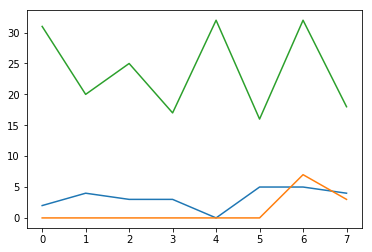

In [36]:
plt.figure()
for key, series in qi_extracted['QIDiabetes'].iteritems():
    plt.plot(series)
    plt.ylabel
plt.show()

In [49]:
# for key_qi, mom in qi_extracted.iteritems():
#     print key_qi
#     for response, responses in mom.iteritems():
#         print '   ' + response
#         print len(responses)
qi_mom_dfs = {key_qi:pd.DataFrame(mom, index = time_points) for key_qi, mom in qi_extracted.iteritems()}

In [38]:
qi_mom_dfs['QIDiabetes'].values.shape[0]

7

In [39]:
qi_mom_dfs['QIDiabetes'].columns

Index([u'Negative', u'Not Questioned', u'Positive'], dtype='object')

NameError: name 'x' is not defined

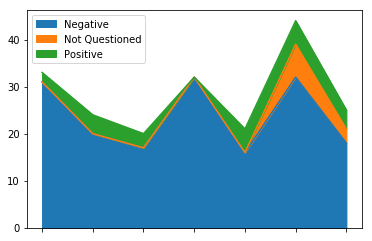

In [40]:
#fig =plt.figure() 
xticks = qi_mom_dfs['QIDiabetes'].index
# ax.set_xticks(xticks)
# ax.tick_params(axis='x', rotation=90)
# values = qi_mom_dfs['QIDiabetes'].values
# plt.stackplot(values)
# 
ax = qi_mom_dfs['QIDiabetes'].plot(kind='area')
plt.xticks(x, xticks, rotation=90)


In [50]:
for key, df in qi_mom_dfs.iteritems():
    print key
    print df
    df.to_csv('ArborQIResults/'+key+'.csv')

QIPHQ2
                   Hopeless Mood Negative  Hopeless Mood Positive  \
10/2017 - 11/2017                      23                       1   
11/2017 - 12/2017                      12                       2   
12/2017 - 1/2018                       17                       1   
1/2018 - 2/2018                         8                       1   
2/2018 - 3/2018                        22                       2   
3/2018 - 4/2018                         9                       1   
4/2018 - 5/2018                        32                       3   
5/2018 - 6/2018                        14                       1   

                   Not Questioned  
10/2017 - 11/2017               9  
11/2017 - 12/2017              10  
12/2017 - 1/2018               10  
1/2018 - 2/2018                11  
2/2018 - 3/2018                 8  
3/2018 - 4/2018                11  
4/2018 - 5/2018                 9  
5/2018 - 6/2018                10  
QIPHQ1
                   Anhedonia Negative  A

In [55]:
qi_extracted_pfc, time_points = qi_extractor(pfc_visits)
qi_mom_dfs_pfc = {key_qi:pd.DataFrame(mom, index = time_points) for key_qi, mom in qi_extracted_pfc.iteritems()}
for key, df in qi_mom_dfs_pfc.iteritems():
    print key
    print df
    df.to_csv('PacificQIResults/'+key+'.csv')

preparing to generate full qi summary text
2017 1
2017 2
2017 3
2017 4
2017 5
2017 6
2017 7
2017 8
2017 9
preparing to generate full qi summary text
QIDiabetes
QIDiabetesA1C: no records found (assume 0)
QIDiabetesFoot
QIDiabetesOphtho
QIDiabetesPneumovax
QIMammo: no records found (assume 0)
QIMentalHealth1: no records found (assume 0)
QIMentalHealth2: no records found (assume 0)
QIMicroalbumin
QIPHQ1
QIPHQ2
QIPap: no records found (assume 0)
2017 10
preparing to generate full qi summary text
QIDiabetes
QIDiabetesA1C
QIDiabetesFoot
QIDiabetesOphtho
QIDiabetesPneumovax
QIMammo
QIMentalHealth1
QIMentalHealth2
QIMicroalbumin
QIPHQ1
QIPHQ2
QIPap
2017 11
preparing to generate full qi summary text
QIDiabetes
QIDiabetesA1C
QIDiabetesFoot
QIDiabetesOphtho: no records found (assume 0)
QIDiabetesPneumovax: no records found (assume 0)
QIMammo
QIMentalHealth1
QIMentalHealth2
QIMicroalbumin: no records found (assume 0)
QIPHQ1
QIPHQ2
QIPap
2017 12
preparing to generate full qi summary text
QIDiabetes